In [4]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

### Etapa 1: Leitura e compreensão dos dados

https://archive.ics.uci.edu/ml/datasets/Automobile

Base de dados para previsão de preços de carros


 ------------------        -----------------------------------------------
 - symboling:                -3, -2, -1, 0, 1, 2, 3. #insurance risk level 
 - normalized-losses:        continuous from 65 to 256.
 - make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury,
                             mitsubishi, nissan, peugeot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
 - fuel-type:                diesel, gas.
 - aspiration:               std, turbo.
 - num-of-doors:             four, two.
 - body-style:               hardtop, wagon, sedan, hatchback, convertible.
 - drive-wheels:             4wd, fwd, rwd.
 - engine-location:          front, rear.
 - wheel-base:               continuous from 86.6 120.9.
 - length:                   continuous from 141.1 to 208.1.
 - width:                    continuous from 60.3 to 72.3.
 - height:                   continuous from 47.8 to 59.8.
 - curb-weight:              continuous from 1488 to 4066.
 - engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 - num-of-cylinders:         eight, five, four, six, three, twelve, two.
 - engine-size:              continuous from 61 to 326.
 - fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 - bore:                     continuous from 2.54 to 3.94.
 - stroke:                   continuous from 2.07 to 4.17.
 - compression-ratio:        continuous from 7 to 23.
 - horsepower:               continuous from 48 to 288.
 - peak-rpm:                 continuous from 4150 to 6600.
 - city-mpg:                 continuous from 13 to 49.
 - highway-mpg:              continuous from 16 to 54.
 - price:                    continuous from 5118 to 45400.



### Vamos começar com as seguintes etapas:

- Importando dados CarPrice_Assinment.csv usando a biblioteca de pandas
- Compreendendo a estrutura dos dados (head, shape , describe e info)

In [17]:
path = os.getcwd()
path_xlsx = path + '/'

In [18]:
df = pd.read_csv(f"{path_xlsx}/CarPrice_Assignment.csv")

In [19]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.shape

(205, 26)

In [12]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Etapa 2: Limpeza e preparação de dados

Dividindo o nome da empresa (company name) na coluna Carname
Veja que na coluna CarName, temos, por exemplo, "alfa-romero stelvio". Portanto, podemos procurar o espaço e deixar somente o nome da companhia.

In [21]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName) #insere na coluna 3 a coluna CompannyName
df.drop(['CarName'],axis=1,inplace=True) #exclui coluna CarName


In [22]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Etapa 3: Procure por nomes de companhia que estão errados e corrija, utilizando o replace. 
Exemplo: cars.CompanyName.unique() para ver os nomes da coluna

Exemplo: cars.CompanyName.replace('maxda','mazda', inplace=True)

In [25]:
df.CompanyName.replace('maxda','mazda', inplace=True)
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

### Etapa 4: Busque o nome das colunas e, se preferir, traduza

In [26]:
df.columns
# df.rename(columns={'car_ID': 'carro_ID', 
#                     'CompanyName': 'NomeDaEmpresa',
#                     'price': 'Preco'}, inplace=True)


Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Etapa 5: Procure se há valores duplicados usando o loc

In [32]:
# Linhas inteiras duplicadas
duplicados = df.loc[df.duplicated()]

print(duplicados)

# Coluna específica duplicadas
duplicados2 = df.loc[df.duplicated(subset='price')]

print(duplicados2)


Empty DataFrame
Columns: [car_ID, symboling, CompanyName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]
     car_ID  symboling  CompanyName fueltype aspiration doornumber    carbody  \
2         3          1  alfa-romero      gas        std        two  hatchback   
36       37          0        honda      gas        std       four      wagon   
45       46          0        isuzu      gas        std       four      sedan   
59       60          1        mazda      gas        std        two  hatchback   
88       89         -1   mitsubishi      gas        std       four      sedan   
103     104          0       nissan      gas        std       four      sedan   
118     119          1     plymouth      gas        std        two  hatchback 

### Etapa 6: Procure se há valores faltantes

In [33]:
print(df.isna().sum())


car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


### Etapa 7: Visualize os preços (faça plots)
- distribuição do preço dos carros por histograma. Pode usar o seaborn se preferir.
- propagação do preço dos carros por boxplot.

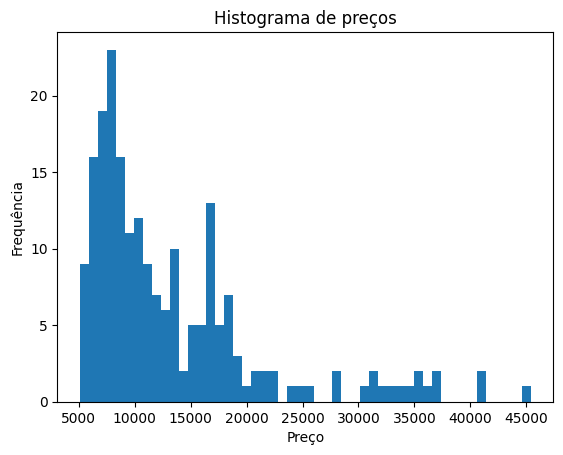

In [34]:
# plotar um histograma dos preços
plt.hist(df['price'], bins=50)
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.title('Histograma de preços')
plt.show()


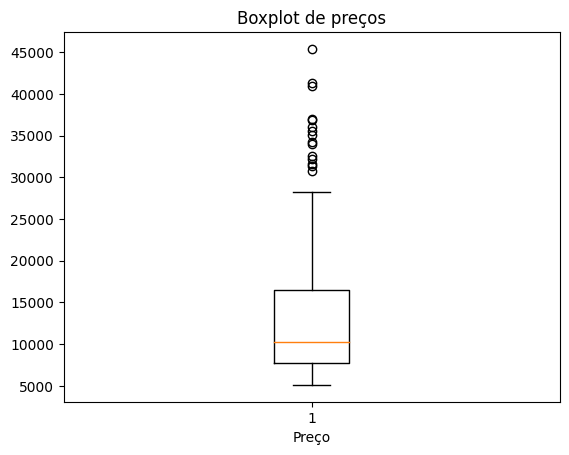

In [35]:
# plota um boxplot dos preços
plt.boxplot(df['price'])
plt.xlabel('Preço')
plt.title('Boxplot de preços')
plt.show()


### Visualize o histograma para verificar os nomes das empresa e frequencia, o combustivel e os tipos de carros

In [36]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

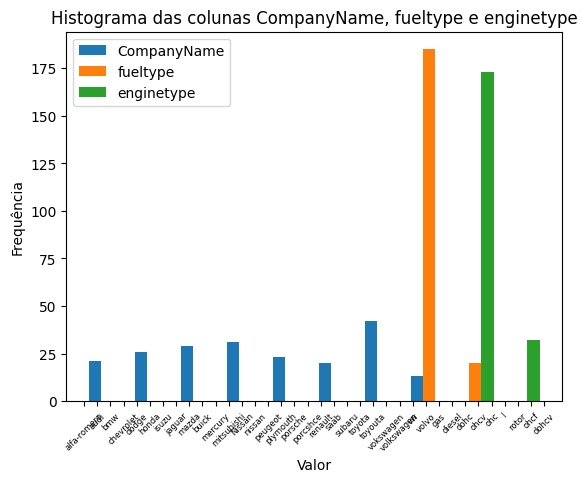

In [41]:
plt.xticks(rotation=45, color='black', fontsize=6) 

# plota um histograma para cada coluna
plt.hist([df['CompanyName'], df['fueltype'], df['enginetype']], bins=10)
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Histograma das colunas CompanyName, fueltype e enginetype')
plt.legend(['CompanyName', 'fueltype', 'enginetype'])
plt.show()


### Monte mais um tipo de visualização, por exemplo Symboling x Price, Engine x Price...

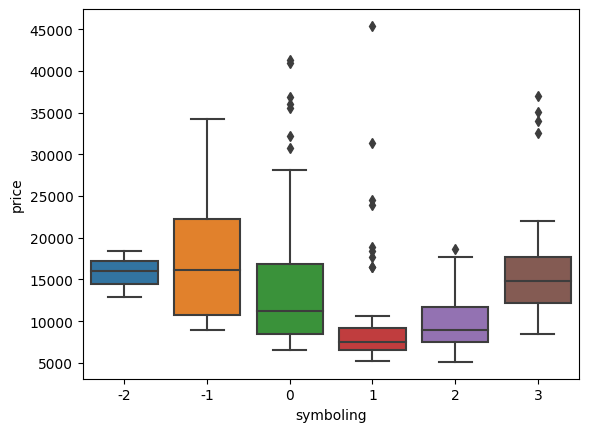

In [42]:
# Plotar o gráfico de boxplot
sns.boxplot(x='symboling', y='price', data=df)
plt.show()



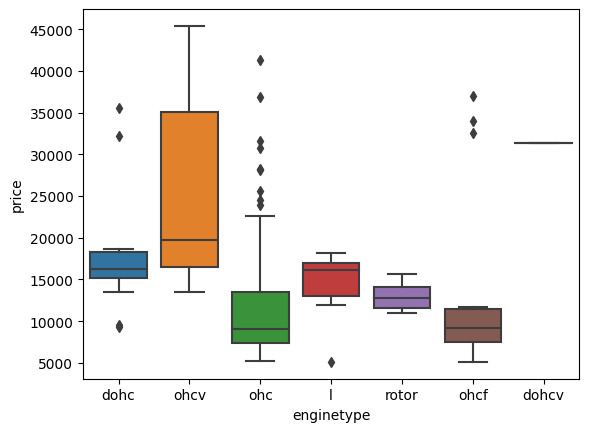

In [43]:
# Plotar o gráfico de boxplot
sns.boxplot(x='enginetype', y='price', data=df)
plt.show()

### Etapa 8: Excluir colunas que não serão usadas no treino

In [76]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company_num'],
      dtype='object')

In [74]:
df = df.drop(['compressionratio', 'stroke'], axis=1) 

In [75]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company_num'],
      dtype='object')

### Etapa 9: Transformar variáveis categóricas em numéricas

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['company_num'] = le.fit_transform(df['CompanyName'])


In [45]:
df['company_num']

0       1
1       1
2       1
3       2
4       2
       ..
200    25
201    25
202    25
203    25
204    25
Name: company_num, Length: 205, dtype: int32

### Etapa 10: Aplique o KNN como sistema preditivo do preço, procurando o valor de K ideal. 
Faça também o calculo do erro, e simule predições de dados desconhecidos.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
x = df['company_num']
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 1))

param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print("Melhor valor de K:", knn_cv.best_params_['n_neighbors'])


Melhor valor de K: 2


In [71]:
knn = KNeighborsRegressor(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn.fit(X_train, y_train)

X_test = scaler.transform(X_test.reshape(-1, 1))
y_pred = knn.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


MAE: 3160.1666612903223
MSE: 17499677.306272402


### Faça um experimento com um vetor "desconhecido". Pegue um vetor da base e simule a predição. Lembre de realizar os tratamentos antes.

### Transforme essa base de dados, para criar 5 categorias de carros conforme o preço. Exemplo: 5000 a 10000 são carros categoria A, de 10000 a 20000, categoria B, e assim por diante até a ultima categoria abranger o valor max do preço.



### Separe a base com 70% treino e 30% teste. Faça o treinamento utilizando Árvore de decisão para classificar um carro conforme a categoria.

### Faça a análise dos resultados por acurácia, precisão e recall. 